# Salary Experience Prediction

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [2]:
salary = pd.read_csv("Employee_Salary.csv")

In [3]:
salary

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448
...,...,...
1995,19.178575,421534.69100
1996,19.254499,430478.02650
1997,19.353369,438090.84540
1998,19.842520,482242.16080


In [4]:
salary.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


## Visualizing the Dataset

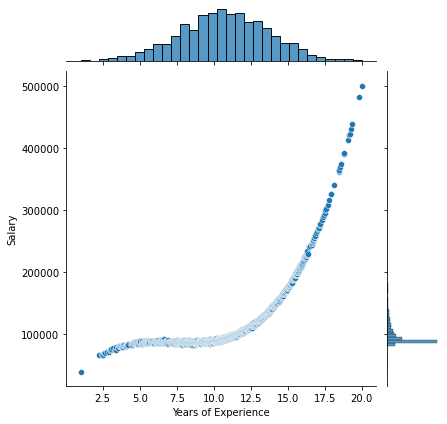

In [5]:
sns.jointplot(x="Years of Experience", y="Salary", data=salary)

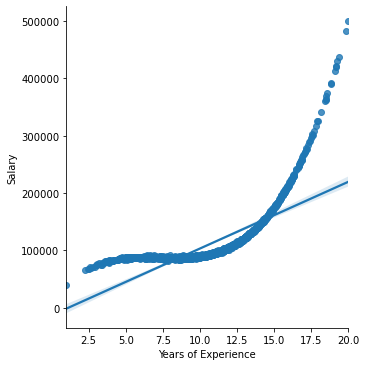

In [6]:
sns.lmplot(x="Years of Experience", y="Salary", data=salary)

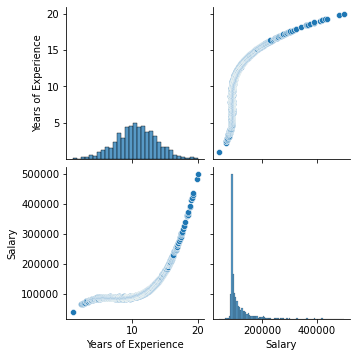

In [7]:
sns.pairplot(data=salary)

## Creating the Training Dataset

In [8]:
X = salary[["Years of Experience"]]
y = salary[["Salary"]]

In [9]:
X_train = X
y_train = y

## Training the Model

### Linear Assumption

In [10]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
print("Linear Model Coefficient (m)", linear_regressor.coef_)
print("Linear Model Coefficient (b)", linear_regressor.intercept_)

Linear Model Coefficient (m) [[11640.22916165]]
Linear Model Coefficient (b) [-13063.09931519]


### Visualizing the Results

Text(0, 0.5, 'Salary')

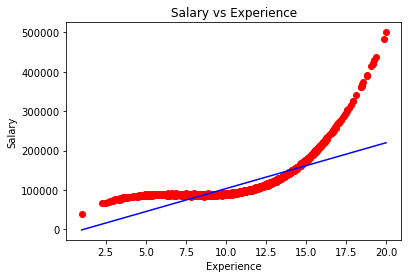

In [12]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, linear_regressor.predict(X_train), color="blue")
plt.title("Salary vs Experience")
plt.xlabel("Experience")
plt.ylabel("Salary")

### Polynomial Assumption

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=3)
X_columns = poly_regressor.fit_transform(X_train)

In [14]:
regressor = LinearRegression()
regressor.fit(X_columns, y_train)

LinearRegression()

In [15]:
print("Polynomail Model Coefficient (m)", regressor.coef_)
print("Polynomial Model Coefficient (b)", regressor.intercept_)

Polynomail Model Coefficient (m) [[    0.         32261.24327461 -4503.00578987   205.20736238]]
Polynomial Model Coefficient (b) [12053.10740863]


### Visualizing the Results

In [16]:
y_pred = regressor.predict(X_columns)

Text(0, 0.5, 'Salary')

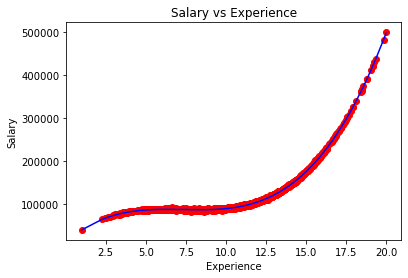

In [17]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, y_pred, color="blue")
plt.title("Salary vs Experience")
plt.xlabel("Experience")
plt.ylabel("Salary")